<a href="https://colab.research.google.com/github/yeeun0813/baewha/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9D%91%EC%9A%A94%EC%9B%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),           # PyTorch 텐서 변환
    transforms.Normalize((0.5,), (0.5,))  # 정규화 (-1 ~ 1)
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.08MB/s]


In [ ]:
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)  # 입력층 → 은닉층 (50 뉴런)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)     # 은닉층 → 출력층 (10 뉴런)

    def forward(self, x):
        x = x.view(-1, 28*28)  # 2D 이미지 -> 1D 벡터 변환
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Softmax는 CrossEntropyLoss에서 자동 적용됨
        return x

In [ ]:
model = TwoLayerNet().to(device)
criterion = nn.CrossEntropyLoss() #손실함수: 교차 엔트로피 함수
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 경사하강법

In [ ]:
# 5. 모델 학습
num_epochs = 16
train_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # 테스트 정확도 계산
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_acc = correct / total
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Test Accuracy: {test_acc:.4f}")


Epoch [1/16], Loss: 0.4868, Test Accuracy: 0.9198
Epoch [2/16], Loss: 0.2364, Test Accuracy: 0.9393
Epoch [3/16], Loss: 0.1795, Test Accuracy: 0.9457
Epoch [4/16], Loss: 0.1512, Test Accuracy: 0.9585
Epoch [5/16], Loss: 0.1286, Test Accuracy: 0.9660
Epoch [6/16], Loss: 0.1157, Test Accuracy: 0.9652
Epoch [7/16], Loss: 0.1065, Test Accuracy: 0.9660
Epoch [8/16], Loss: 0.0988, Test Accuracy: 0.9679
Epoch [9/16], Loss: 0.0916, Test Accuracy: 0.9708
Epoch [10/16], Loss: 0.0851, Test Accuracy: 0.9712
Epoch [11/16], Loss: 0.0814, Test Accuracy: 0.9671
Epoch [12/16], Loss: 0.0769, Test Accuracy: 0.9720
Epoch [13/16], Loss: 0.0727, Test Accuracy: 0.9699
Epoch [14/16], Loss: 0.0695, Test Accuracy: 0.9709
Epoch [15/16], Loss: 0.0663, Test Accuracy: 0.9696
Epoch [16/16], Loss: 0.0632, Test Accuracy: 0.9659


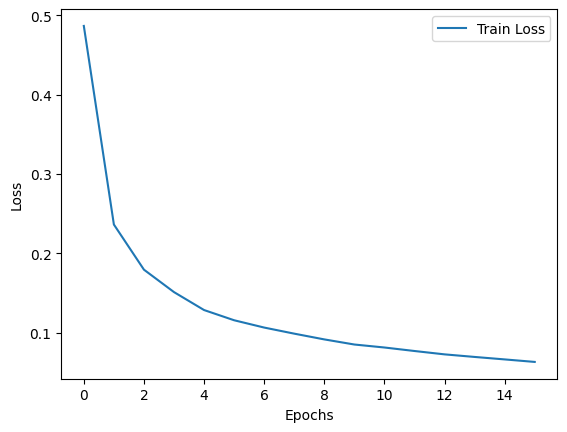

In [ ]:
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

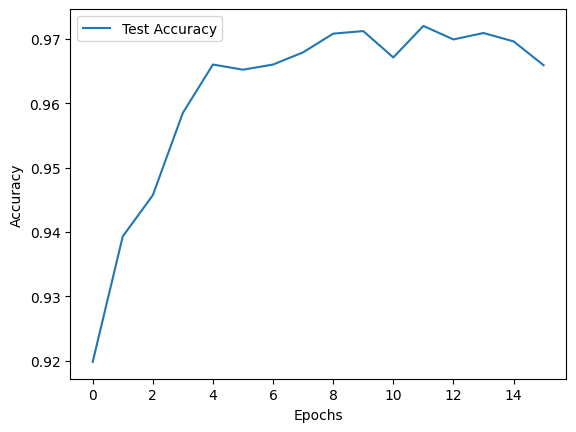

In [ ]:
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
learning_rate = 0.001
batch = 32
epochs = 15

image_size = 32
nb_class = 10

In [ ]:
# transforms 정의하기
transforms = transforms.Compose([transforms.Resize((image_size, image_size)),
                                 transforms.ToTensor()])

# data set 다운받고 생성하기
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms)

# data loader 정의하기
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch,
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=batch,
                          shuffle=False)

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, n_classes):
        super(LeNet5, self).__init__()

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes),
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [ ]:
def get_accuracy(model, data_loader, device):
    correct_pred = 0
    n = 0

    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

In [ ]:
def plot_losses(train_losses, valid_losses):
    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss')
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs",
            xlabel='Epoch',
            ylabel='Loss')
    ax.legend()
    fig.show()

    # plot style을 기본값으로 설정
    plt.style.use('default')

In [ ]:
def train(train_loader, model, criterion, optimizer, device):
    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        # 역전파
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

In [ ]:
def validate(valid_loader, model, criterion, device):
    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파와 손실 기록하기
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss


In [ ]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    # metrics를 저장하기 위한 객체 설정
    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # model 학습하기
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, optimizer, (train_losses, valid_losses)

11:01:55 --- Epoch: 0	Train loss: 0.2300	Valid loss: 0.0937	Train accuracy: 97.28	Valid accuracy: 97.00
11:02:22 --- Epoch: 1	Train loss: 0.0839	Valid loss: 0.0658	Train accuracy: 98.23	Valid accuracy: 97.86
11:02:47 --- Epoch: 2	Train loss: 0.0583	Valid loss: 0.0575	Train accuracy: 98.59	Valid accuracy: 98.11
11:03:13 --- Epoch: 3	Train loss: 0.0464	Valid loss: 0.0557	Train accuracy: 98.85	Valid accuracy: 98.10
11:03:38 --- Epoch: 4	Train loss: 0.0374	Valid loss: 0.0571	Train accuracy: 98.85	Valid accuracy: 98.27
11:04:04 --- Epoch: 5	Train loss: 0.0317	Valid loss: 0.0437	Train accuracy: 99.32	Valid accuracy: 98.68
11:04:30 --- Epoch: 6	Train loss: 0.0260	Valid loss: 0.0422	Train accuracy: 99.40	Valid accuracy: 98.63
11:04:56 --- Epoch: 7	Train loss: 0.0233	Valid loss: 0.0460	Train accuracy: 99.49	Valid accuracy: 98.56
11:05:21 --- Epoch: 8	Train loss: 0.0202	Valid loss: 0.0467	Train accuracy: 99.47	Valid accuracy: 98.68
11:05:47 --- Epoch: 9	Train loss: 0.0181	Valid loss: 0.0507	Trai

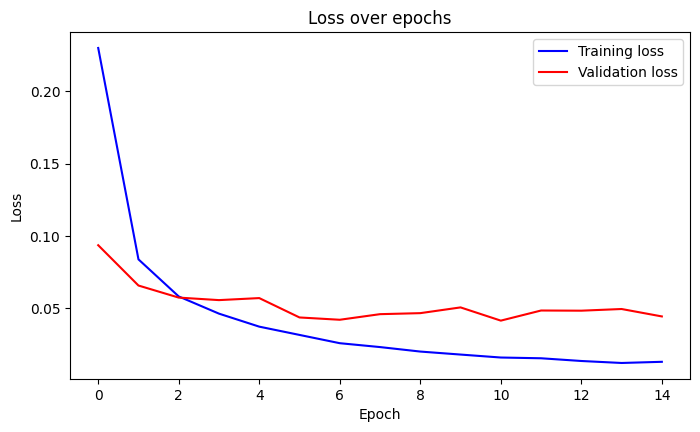

In [ ]:
#RANDOM_SEED = 42
#torch.manual_seed(RANDOM_SEED)

model = LeNet5(nb_class).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()


model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader,
                                    valid_loader, epochs, device)

In [ ]:
#토큰나이저 설치
!pip install sentencepiece
#데이터 직렬화 util 설치
!pip install protobuf
#Hugging face 의 trasnformer 설치
!pip install transformers

In [ ]:
# 예제 이미지 다운로드
!rm -rf ocr_test_image
!mkdir ocr_test_image
#!cd ocr_test_image && wget https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/Hello.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_01.png
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_02.png


--2025-04-14 11:19:24--  https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg [following]
--2025-04-14 11:19:24--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13376 (13K) [image/jpeg]
Saving to: ‘a01-122-02.jpg’

a01-122-02.jpg      100%[===================>]  13.06K  --.-KB/s    in 0.001s  

2025-04-14 11:19:24 (24.9 MB/s) - ‘a01-122-02.jpg’ saved [13376/13376]

--2025-04-14 11:19:25-- 

In [ ]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

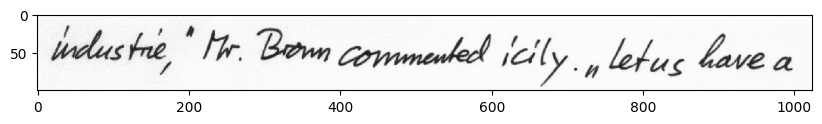

In [ ]:
# Load image
image = Image.open("./ocr_test_image/a01-122-02.jpg").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

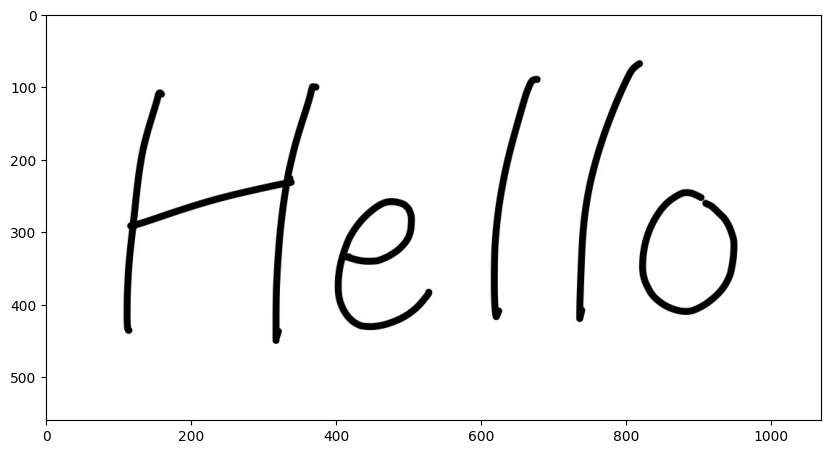

In [ ]:
# Load image
image = Image.open("./ocr_test_image/Hello.jpg").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

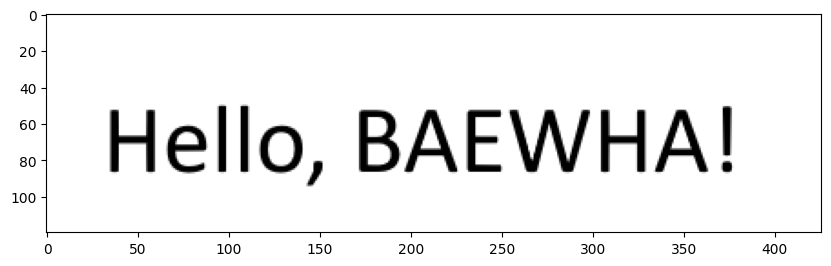

In [ ]:
# Load image
image = Image.open("./ocr_test_image/test_01.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

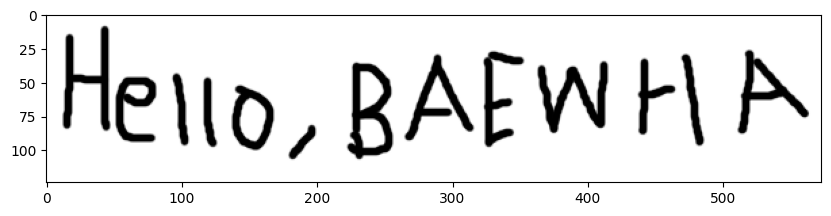

In [ ]:
# Load image
image = Image.open("./ocr_test_image/test_02.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

In [ ]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor
[INFO] Load pretrained VisionEncoderDecoderModel


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [ ]:
# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [ ]:
text_from_image

'HE110 , BAEW H.A.'